In [ ]:
# Shaurya Jeloka, Ian Jeong, Akshay Vakharia 
# 1/25/2024

# This file is the front end visualizer for our chess data analysis project, where we display
# all the graphs, dataframes, and widgets defined in the backend ChessFunctions.py file. This
# is the only file that external users interact with and is designed to be visually appealing 
# and easy to use.

In [170]:
import pandas as pd
import chess
import chess.svg
import IPython
from IPython.display import display, SVG, clear_output, HTML
from ipywidgets import widgets
import time
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
import ChessFunctions as cf

In [172]:
# Read csv dataset into pandas dataframe and show stats
games_df = pd.read_csv("games.csv")
games_df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [173]:
# Call getwinners function from ChessFunctions module to calculate win percentages in various situations
print('Win percentage of white when white has a higher rating:', 
      round(cf.getwinners('white_rating', 'black_rating', 'white')))

print('Win percentage of black when white has a higher rating:', 
      round(cf.getwinners('white_rating', 'black_rating', 'black')))

print('Win percentage of black when black has a higher rating:', 
      round(cf.getwinners('black_rating', 'white_rating', 'black')))

print('Win percentage of white when black has a higher rating:', 
      round(cf.getwinners('black_rating', 'white_rating', 'white')))

Win percentage of white when white has a higher rating: 64
Win percentage of black when white has a higher rating: 31
Win percentage of black when black has a higher rating: 60
Win percentage of white when black has a higher rating: 35


As expected, the player with the higher rating usually wins the game. However, there is a difference of 4 percent between the black and white win percentage in each scenario - almost like white has an advantage... Let's delve deeper into the win percentages for each rating group

In [174]:
# Display win_rates_df defined in ChessFunctions module
cf.win_rates_df

,white_win_rate,black_win_rate,win_rate_diff,total_matches
0-1200,49.957228,44.910180,5.047049,1169.0
1200-1400,51.862932,44.547185,7.315747,3677.0
1400-1600,50.049456,45.911639,4.137817,6066.0
1600-1800,49.658120,45.448718,4.209402,4680.0
1800-2000,48.938322,45.534210,3.404112,2967.0
2000-2200,46.986971,46.091205,0.895765,1228.0
2200-2400,45.769231,41.923077,3.846154,260.0
2400-2600,18.181818,54.545455,-36.363636,11.0


Interesting - the win rate for white is consistently higher than the win rate for black, although there isn't any clear pattern in the difference in win percentages. This holds true for all rating groups except 2400-2600, but as we only have 11 matches of data for this rating range, we can ignore the anomaly in the data. Now, let's explore differences between rated and unrated matches

In [175]:
# Create new avrating column that takes the average of the black rating and white rating in the match
games_df['avrating'] = (games_df['white_rating']+games_df['black_rating'])/2

# Compare avergaing rating column between rated and unrated games
games_df.groupby('rated').agg({'avrating': 'mean'})

,avrating
rated,
False,1582.091596
True,1595.302600


There isn't much of a difference between player ratings in rated and unrated matches - about 13.2/1595 (less than one percent).

Number of unrated games that white won: 1949
Number of unrated games that black won: 1723
Number of unrated games that ended in a draw: 231


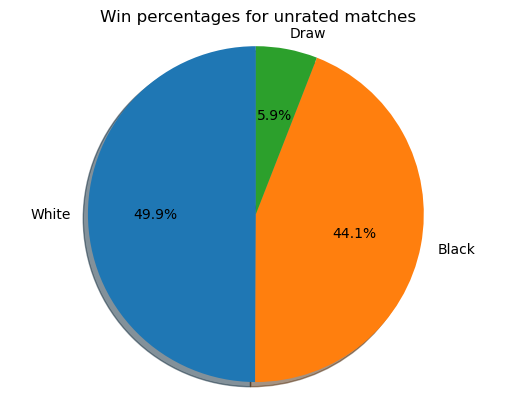

In [176]:
# Calculate win percentages for unrated games using pandas' query() method
print('Number of unrated games that white won:', len(cf.gamesnotrated.query("winner == 'white'")))
print('Number of unrated games that black won:', len(cf.gamesnotrated.query("winner == 'black'")))
print('Number of unrated games that ended in a draw:', len(cf.gamesnotrated.query("winner == 'draw'")))

# Display pie chart showing win percentages for unrated matches using rating_win_pie_chart function defined 
# in ChessFunctions module
cf.rating_win_pie_chart(cf.gamesnotrated, 'unrated')

Number of rated games that white won: 8052
Number of rated games that black won: 7384
Number of rated games that ended in a draw: 719


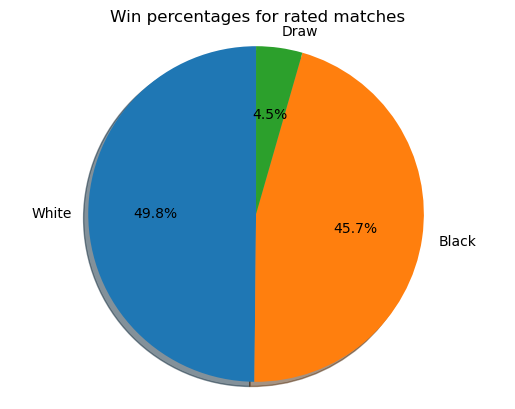

In [177]:
# Calculate win percentages for rated games using pandas' query() method
print('Number of rated games that white won:', len(cf.gamesrated.query("winner == 'white'")))
print('Number of rated games that black won:', len(cf.gamesrated.query("winner == 'black'")))
print('Number of rated games that ended in a draw:', len(cf.gamesrated.query("winner == 'draw'")))

# Display pie chart showing win percentages for rated matches using rating_win_pie_chart function 
# defined in ChessFunctions module
cf.rating_win_pie_chart(cf.gamesrated, 'rated')

The player playing white seems to have an advantage over the player playing black, regardless of whether or not the match is rated

In [178]:
# Compare turns column mean value for each possible match outcome
games_df.groupby('winner').agg({'turns': 'mean'})

,turns
winner,
black,60.724388
draw,86.157895
white,57.790221


That's interesting. The matches that ended in a draw usually had more turns played than matches won by either side, as expected. However, the matches won by the player playing black seem to last more than 5 percent longer than those won by the player playing white.

In [179]:
# Compare turns column mean value for rated and unrated games
games_df.groupby('rated').agg({'turns':'mean'})

,turns
rated,
False,54.271586
True,61.962550


The games that were rated generally had 7.7 more turns played per match than the unrated games. Let's take a closer look at how rating affect turns played through a graph

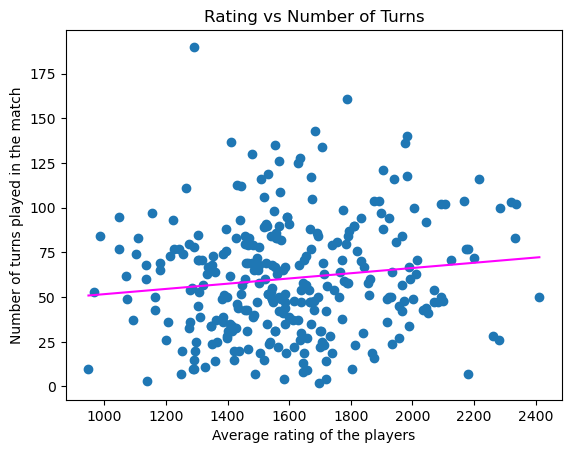

In [180]:
# Display ratings vs turns scatter plot by calling turnsvrating function defined in ChessFunctions module
cf.turnsvrating()

As we can see through the positive slope of the line of best fit, higher ratings lead to higher turns played on average. Now, let's look at whether the number of games played in a match has any correlation with the win percentages for white and black

In [187]:
# Display turns_win_rates dataframe defined in ChessFunctions module
cf.turns_win_rates

winner,black,draw,white
turns_category,,,
0-30,0.404128,0.038289,0.557583
31-60,0.460553,0.020492,0.518955
61-90,0.480581,0.036199,0.483220
91-120,0.452924,0.107424,0.439652
121-150,0.434733,0.161180,0.404086
150+,0.437299,0.221865,0.340836


Very interesting - this dataframe shows that there is indeed a correlation between turns played and win percenatges for each color. As the number of turns played in a game increases, the win percentage for white consistently decreases. White seems to be much better at blitz matches and shorter games whereas black has the edge in longer matches. Now, let's turn our attention to the openings that are most successful for each color

In [188]:
# Print a bolded descriptor to clearly indicate the upcoming data
# This statement introduces the data showing the most successful openings for the player playing black
print('\033[1m' + "This series shows the openings with which the player playing black got the most wins." + '\033[0m')

# Print the top 10 most frequent openings leading to victories for black
print(cf.freq_black.head(10))

# Print another bolded descriptor to introduce the sorted list of openings
print('\033[1m' + "\nThis list shows the above series sorted by the win percentage for each opening" + '\033[0m')

# Print each opening along with its win percentage for black in descending order
for opening in cf.black_openings.items():
    print(opening)

This series shows the openings with which the player playing black got the most wins.
Van't Kruijs Opening                     226
Sicilian Defense                         194
Sicilian Defense: Bowdler Attack         164
Scandinavian Defense                     123
French Defense: Knight Variation         121
Scotch Game                              115
Queen's Pawn Game: Chigorin Variation    109
Queen's Pawn Game: Mason Attack          103
Indian Game                              100
Philidor Defense #2                       96
Name: opening_name, dtype: int64

This list shows the above series sorted by the win percentage for each opening
("Van't Kruijs Opening", 61.41304347826087)
('Sicilian Defense: Bowdler Attack', 55.4054054054054)
('Indian Game', 55.24861878453039)
('Scandinavian Defense', 55.15695067264574)
('Sicilian Defense', 54.18994413407822)
('Philidor Defense #2', 49.740932642487046)
("Queen's Pawn Game: Chigorin Variation", 47.59825327510917)
('French Defense: Knight Var

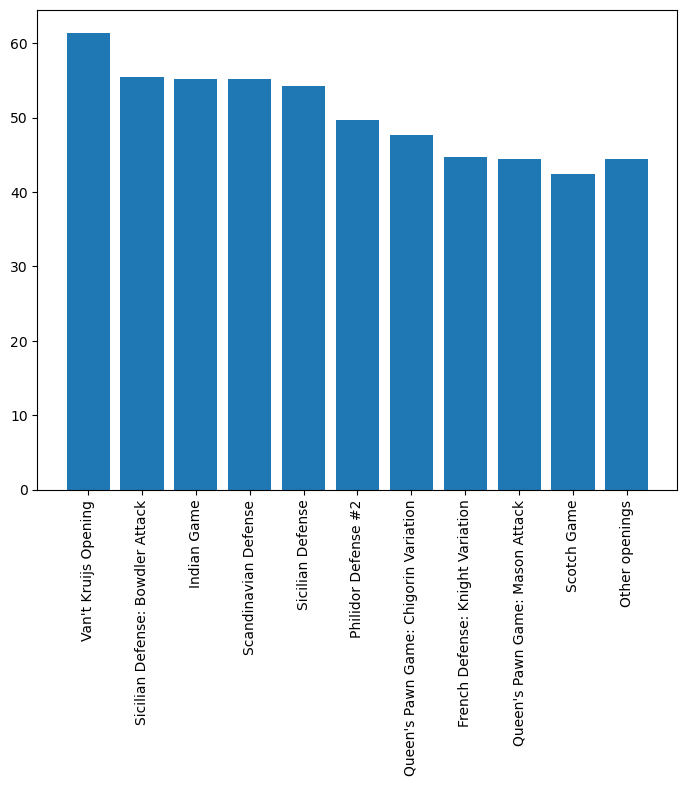

<Figure size 1000x600 with 0 Axes>

In [189]:
# Display bar chart showing black's win percentages with frequent openings using openings_dict_bar_chart function 
# defined in ChessFunctions module
cf.openings_dict_bar_chart(cf.black_openings)

In [190]:
# Print a bolded descriptor to clearly indicate the upcoming data
# This statement introduces the data showing the most successful openings for the player playing white
print('\033[1m' + "This series shows the openings with which the player playing white got the most wins." + '\033[0m')

# Print the top 10 most frequent openings leading to victories for white
print(cf.freq_white.head(10))

# Print another bolded descriptor to introduce the sorted list of openings
print('\033[1m' + "\nThis list shows the above series sorted by the win percentage for each opening" + '\033[0m')

# Print each opening along with its win percentage for white in descending order
for opening in cf.white_openings.items():
    print(opening)

This series shows the openings with which the player playing white got the most wins.
Scandinavian Defense: Mieses-Kotroc Variation    164
Sicilian Defense                                 149
Scotch Game                                      145
French Defense: Knight Variation                 135
Philidor Defense #3                              127
Van't Kruijs Opening                             126
Sicilian Defense: Bowdler Attack                 119
Queen's Pawn Game: Mason Attack                  116
Queen's Pawn Game: Chigorin Variation            112
Horwitz Defense                                  110
Name: opening_name, dtype: int64

This list shows the above series sorted by the win percentage for each opening
('Philidor Defense #3', 64.14141414141415)
('Scandinavian Defense: Mieses-Kotroc Variation', 63.32046332046332)
('Scotch Game', 53.50553505535055)
('Horwitz Defense', 52.63157894736842)
("Queen's Pawn Game: Mason Attack", 50.0)
('French Defense: Knight Variation', 49.815

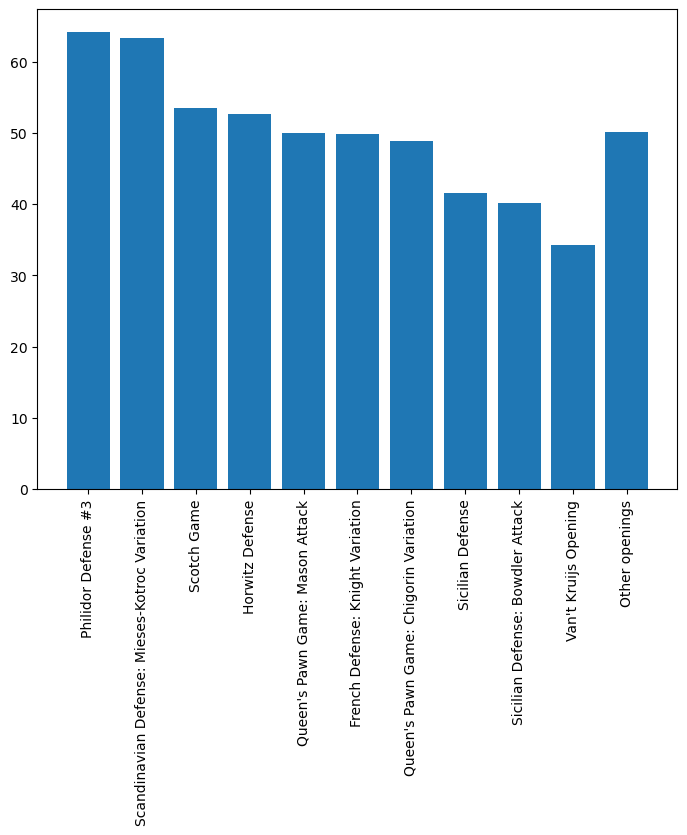

<Figure size 1000x600 with 0 Axes>

In [191]:
# Display bar chart showing white's win percentages with frequent openings using openings_dict_bar_chart function 
# defined in ChessFunctions module
cf.openings_dict_bar_chart(cf.white_openings)

In [192]:
# Format and display widgets and outputs for interactive UI defined in ChessFunctions module
display(widgets.HBox([cf.dropdown, cf.clear_button]))
display(widgets.HBox([cf.out, cf.out2])) 
display(widgets.HBox([cf.text_box_id, cf.text_box_seconds, cf.simulate_button]))
display(cf.out3)

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…